In [479]:
# Importamos librerías de análisis de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import sys

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

VALOR_CAMBIO_A_DOLAR = 19.54

In [480]:
#Cargamos el dataframe
propiedades = pd.read_csv('data/train.csv', parse_dates=['fecha'])

In [481]:
propiedades.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07,0.0,0.0,0.0,0.0,0.0,1150000.0


In [482]:
propiedades_columns = propiedades.columns
propiedades_columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [483]:
propiedades_index = propiedades.index
propiedades_index

RangeIndex(start=0, stop=240000, step=1)

In [484]:
propiedades.dtypes

id                                     int64
titulo                                object
descripcion                           object
tipodepropiedad                       object
direccion                             object
ciudad                                object
provincia                             object
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float64
metrostotales                        float64
idzona                               float64
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                             float64
usosmultiples                        float64
piscina                              float64
escuelascercanas                     float64
centroscomercialescercanos           float64
precio    

In [485]:
propiedades.shape

(240000, 23)

In [486]:
propiedades.count() #Some columns contains Nan values

id                            240000
titulo                        234613
descripcion                   238381
tipodepropiedad               239954
direccion                     186928
ciudad                        239628
provincia                     239845
antiguedad                    196445
habitaciones                  217529
garages                       202235
banos                         213779
metroscubiertos               222600
metrostotales                 188533
idzona                        211379
lat                           116512
lng                           116512
fecha                         240000
gimnasio                      240000
usosmultiples                 240000
piscina                       240000
escuelascercanas              240000
centroscomercialescercanos    240000
precio                        240000
dtype: int64

In [487]:
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [488]:
propiedades['precio(USD)'] = propiedades['precio'] / VALOR_CAMBIO_A_DOLAR
propiedades.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,precio(USD)
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,NaN,NaN,2015-08-23,0.0,0.0,0.0,0.0,0.0,2273000.0,116325.486182
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,19.310205,-99.227655,2013-06-28,0.0,0.0,0.0,1.0,1.0,3600000.0,184237.461617
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,NaN,NaN,2015-10-17,0.0,0.0,0.0,0.0,0.0,1200000.0,61412.487206
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,19.301890,-99.688015,2012-03-09,0.0,0.0,0.0,1.0,1.0,650000.0,33265.097236
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,NaN,NaN,2016-06-07,0.0,0.0,0.0,0.0,0.0,1150000.0,58853.633572


In [489]:
#Creo un nuevo dataframe que contengo solo la ciudad y el precio. Excluye los registros sin ciudad
precioPorProvincia = propiedades.dropna(subset=['provincia'])[['provincia', 'precio(USD)']]

In [490]:
precioPorProvincia = precioPorProvincia.groupby(['provincia']).mean()
precioPorProvincia = precioPorProvincia.sort_values(by=['precio(USD)'])

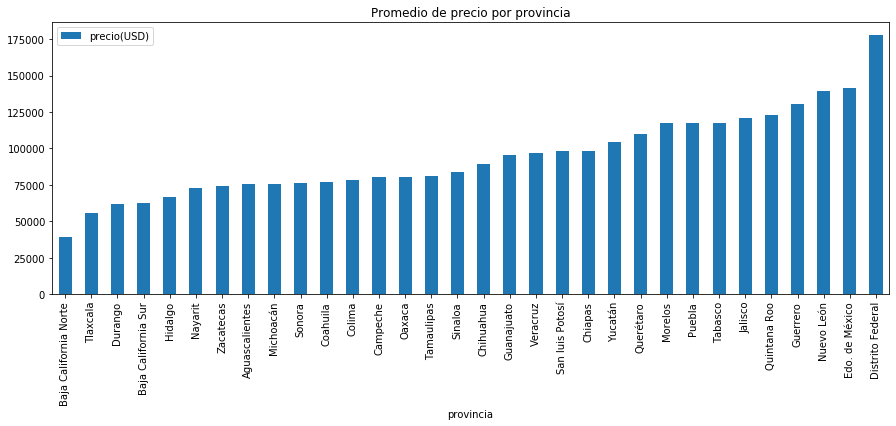

In [491]:
precioPorProvincia.plot(kind='bar', figsize=(15, 5), rot=90, 
                                       title="Promedio de precio por provincia");

In [492]:
#No borrar, ver con profe de que forma podría lograr esto ¿?
#precioPorAntiguedad = propiedades.dropna(subset=['antiguedad'])[['antiguedad', 'habitaciones','precio(USD)']]
#precioPorAntiguedad.head()
#precioPorAntiguedad = precioPorAntiguedad.groupby(['antiguedad', 'habitaciones']).mean()
#precioPorAntiguedad
#precioPorAntiguedad = precioPorAntiguedad.groupby(['antiguedad']).mean()
#precioPorAntiguedad.sort_values(by=['antiguedad'], inplace=True)
#precioPorAntiguedad

In [493]:
#Creo dataframe que tenga como columnas tipoDePropiedad y los piscina
piscinaPorTipoPropiedad = propiedades[['tipodepropiedad','piscina']].dropna(subset=['tipodepropiedad'])
#piscinaPorTipoPropiedad.count()
#piscinaPorTipoPropiedad.head()
piscinaPorTipoPropiedad = piscinaPorTipoPropiedad.groupby(['tipodepropiedad']).sum()
piscinaPorTipoPropiedad

,piscina
tipodepropiedad,
Apartamento,8095.0
Bodega comercial,0.0
Casa,9109.0
Casa en condominio,2973.0
Casa uso de suelo,0.0
Departamento Compartido,26.0
Duplex,0.0
Edificio,1.0
Garage,0.0


In [494]:
#Creo dataframe que tenga como columnas tipoDePropiedad y gimnasio
gimnasioPorTipoPropiedad = propiedades[['tipodepropiedad','gimnasio']].dropna(subset=['tipodepropiedad'])
gimnasioPorTipoPropiedad = gimnasioPorTipoPropiedad.groupby(['tipodepropiedad']).sum()
gimnasioPorTipoPropiedad
#gimnasioPorTipoPropiedad.count()
#gimnasioPorTipoPropiedad.head()

,gimnasio
tipodepropiedad,
Apartamento,7591.0
Bodega comercial,0.0
Casa,6105.0
Casa en condominio,1262.0
Casa uso de suelo,0.0
Departamento Compartido,34.0
Duplex,0.0
Edificio,0.0
Garage,0.0


In [495]:
#Creo dataframe que tenga como columnas tipoDePropiedad y usosmultiples
usosmultiplesPorTipoPropiedad = propiedades[['tipodepropiedad','usosmultiples']].dropna(subset=['tipodepropiedad'])
usosmultiplesPorTipoPropiedad = usosmultiplesPorTipoPropiedad.groupby(['tipodepropiedad']).sum()
usosmultiplesPorTipoPropiedad
#usosmultiplesPorTipoPropiedad.count()
#usosmultiplesPorTipoPropiedad.head()

,usosmultiples
tipodepropiedad,
Apartamento,6187.0
Bodega comercial,0.0
Casa,5099.0
Casa en condominio,1907.0
Casa uso de suelo,0.0
Departamento Compartido,26.0
Duplex,0.0
Edificio,1.0
Garage,0.0


In [496]:
garagesPorTipoPropiedad = propiedades[['tipodepropiedad','garages']].dropna(subset=['tipodepropiedad']).dropna(subset=['garages'])
garagesPorTipoPropiedad = garagesPorTipoPropiedad.groupby(['tipodepropiedad']).sum()
garagesPorTipoPropiedad
#garagesPorTipoPropiedad.count()
#garagesPorTipoPropiedad.head()

,garages
tipodepropiedad,
Apartamento,75596.0
Bodega comercial,427.0
Casa,200883.0
Casa en condominio,30645.0
Casa uso de suelo,668.0
Departamento Compartido,192.0
Duplex,397.0
Edificio,633.0
Garage,0.0


In [497]:
#Creo dataframe que tenga como columnas tipoDePropiedad y los piscina
amenitiesPorPropiedad = propiedades[['tipodepropiedad','piscina','gimnasio', 'usosmultiples','garages']].dropna(subset=['tipodepropiedad']).dropna(subset=['garages'])
amenitiesPorPropiedad = amenitiesPorPropiedad.groupby(['tipodepropiedad']).mean()
amenitiesPorPropiedad.head()


,piscina,gimnasio,usosmultiples,garages
tipodepropiedad,,,,
Apartamento,0.137879,0.134950,0.110904,1.410242
Bodega comercial,0.000000,0.000000,0.000000,0.484677
Casa,0.062528,0.029807,0.035557,1.705926
Casa en condominio,0.154421,0.064197,0.099191,1.908157
Casa uso de suelo,0.000000,0.000000,0.000000,1.427350


In [498]:
#TODO: Move this for another file
def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

In [499]:
#TODO: Move this for another file
def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolized Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
    data = [
        amenitiesPorPropiedad.columns,
        ('tipodepropiedad', [
            [0.88, 0.01, 0.03, 0.03],
            [0.07, 0.95, 0.04, 0.05],
            [0.01, 0.02, 0.85, 0.19],
            [0.02, 0.01, 0.07, 0.01],
            [0.01, 0.01, 0.02, 0.71]]
        )
    ]
    return data

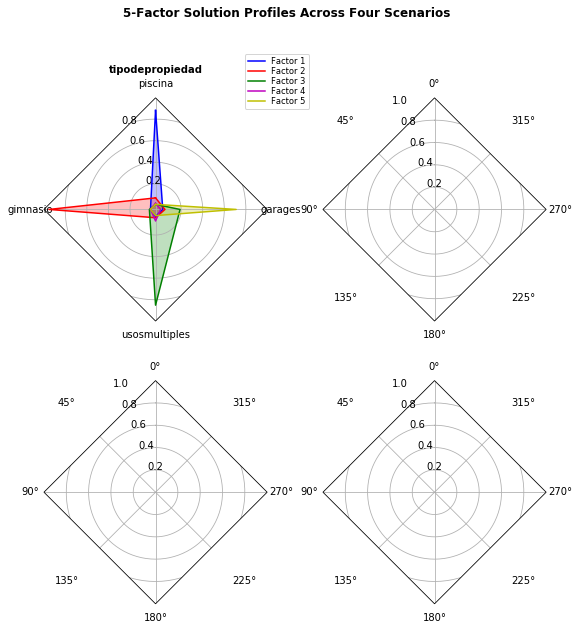

In [518]:
#TODO: Move this for another file
#TODO: This is an implementaion for another visualization, is in progress yet
if __name__ == '__main__':
    N = 4
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axes = plt.subplots(figsize=(9, 9), nrows=2, ncols=2,
                             subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm', 'y']
    # Plot the four cases from the example data on separate axes
    for ax, (title, case_data) in zip(axes.flat, data):
        ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
        ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    ax = axes[0, 0]
    labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
    legend = ax.legend(labels, loc=(0.9, .95),
                       labelspacing=0.1, fontsize='small')

    fig.text(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',
             horizontalalignment='center', color='black', weight='bold',
             size='large')

    plt.show()